In [ ]:
#Prepare a classification model using SVM for salary data

#Data Description:

#age -- age of a person
#workclass	-- A work class is a grouping of work
#education	-- Education of an individuals
#maritalstatus -- Marital status of an individulas
#occupation	 -- occupation of an individuals
#relationship --
#race --  Race of an Individual
#sex --  Gender of an Individual
#capitalgain --  profit received from the sale of an investment
#capitalloss	-- A decrease in the value of a capital asset
#hoursperweek -- number of hours work per week
#native -- Native of an individual
#Salary -- salary of an individual

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
data = pd.read_csv('/content/SalaryData_Train(1).csv')

In [ ]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

In [ ]:
# Preprocess the data
le = LabelEncoder()
categorical_columns = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

for column in categorical_columns:
    data[column] = le.fit_transform(data[column])


In [ ]:
# Define features (X) and target variable (y)
X = data.drop('Salary', axis=1)
y = data['Salary']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the SVM model
svm_model = SVC()

In [ ]:
# Train the model
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

In [ ]:
# Display the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.7923089673462622
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      4490
           1       0.77      0.27      0.40      1543

    accuracy                           0.79      6033
   macro avg       0.78      0.62      0.64      6033
weighted avg       0.79      0.79      0.75      6033



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

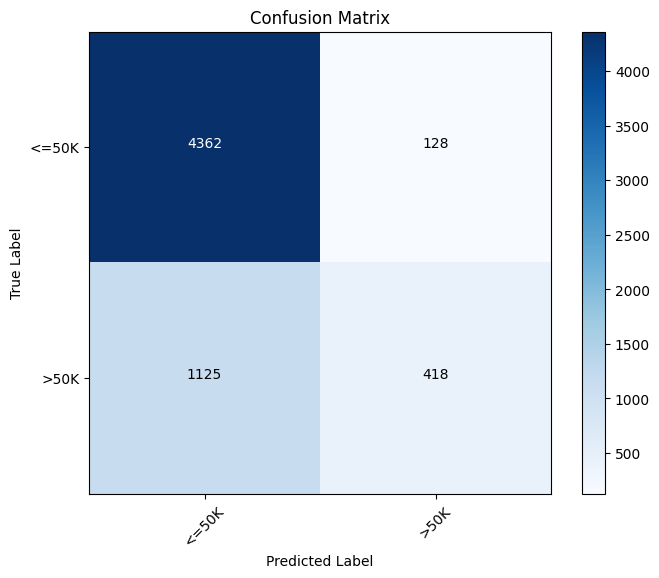

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['<=50K', '>50K']
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()


In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

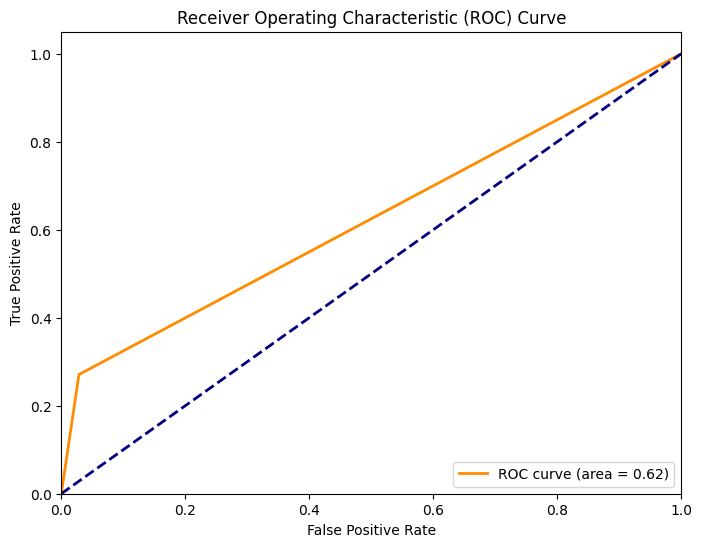

In [ ]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

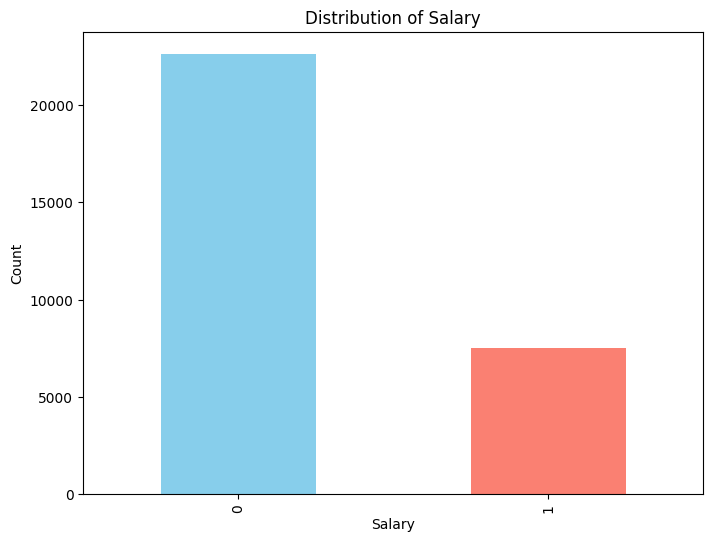

In [ ]:
# Example for target variable distribution
plt.figure(figsize=(8, 6))
data['Salary'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()


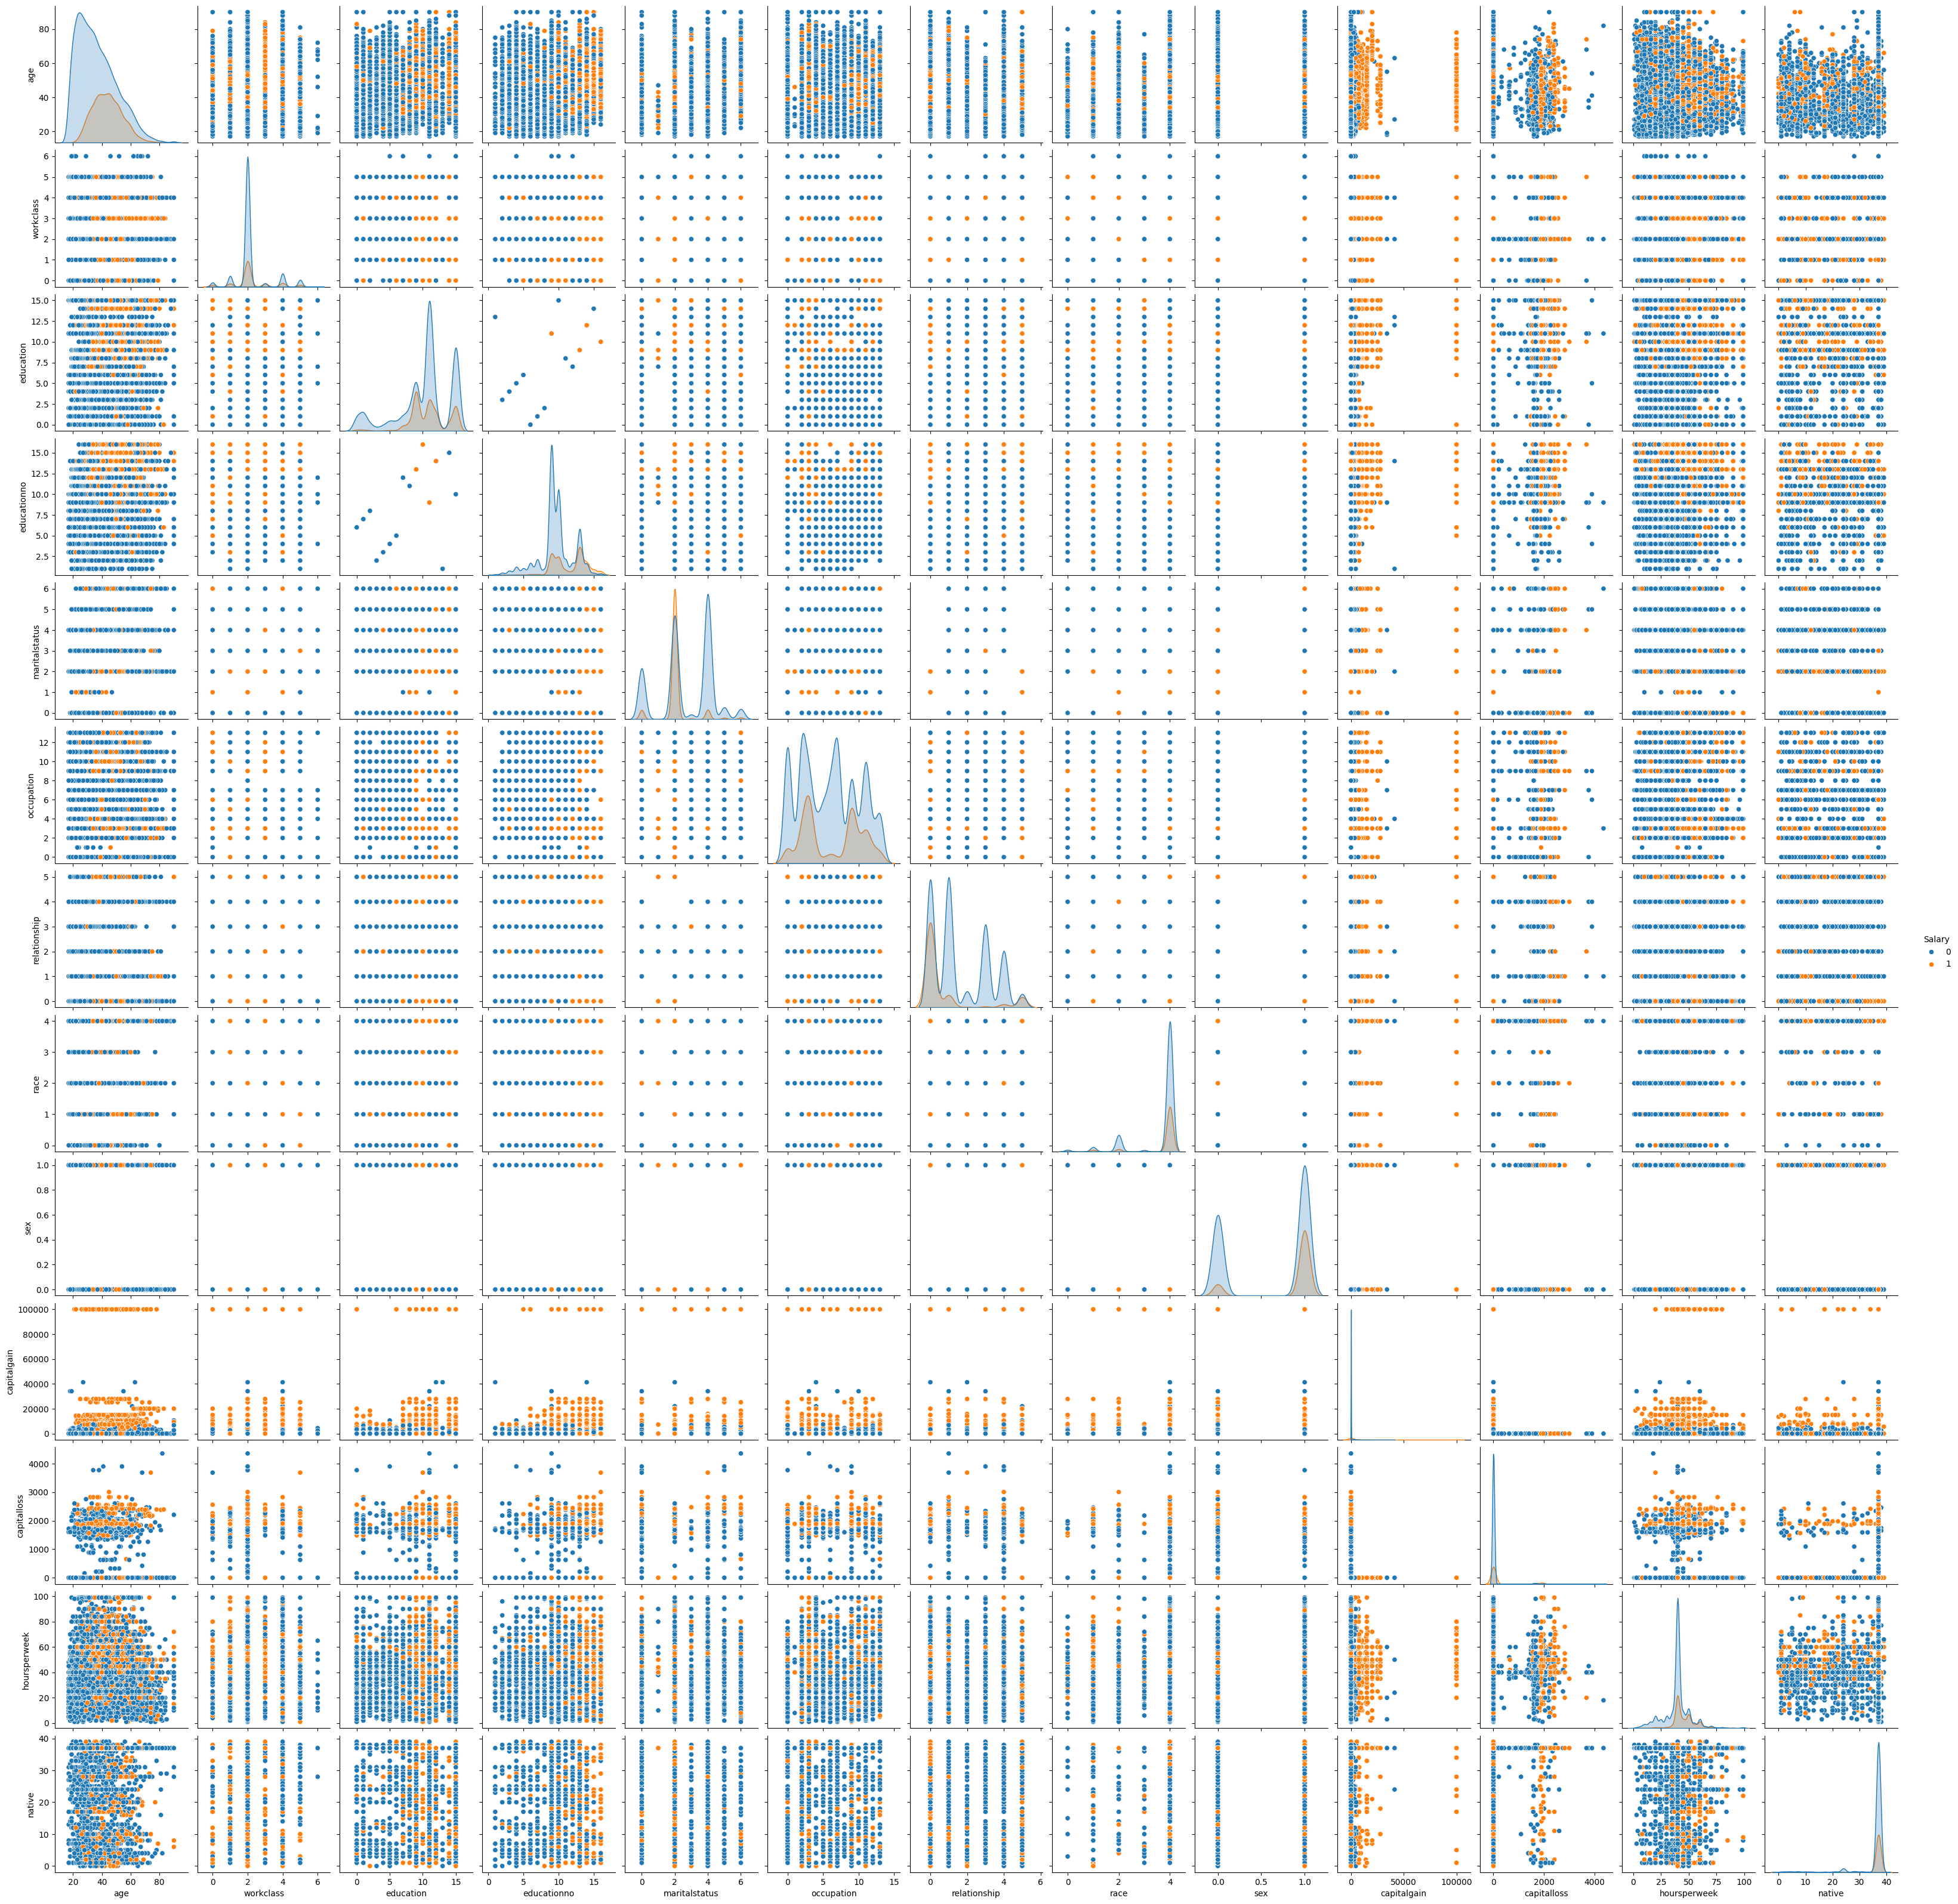

In [ ]:
# Example for a pair plot
import seaborn as sns
sns.pairplot(data, hue='Salary')
plt.show()


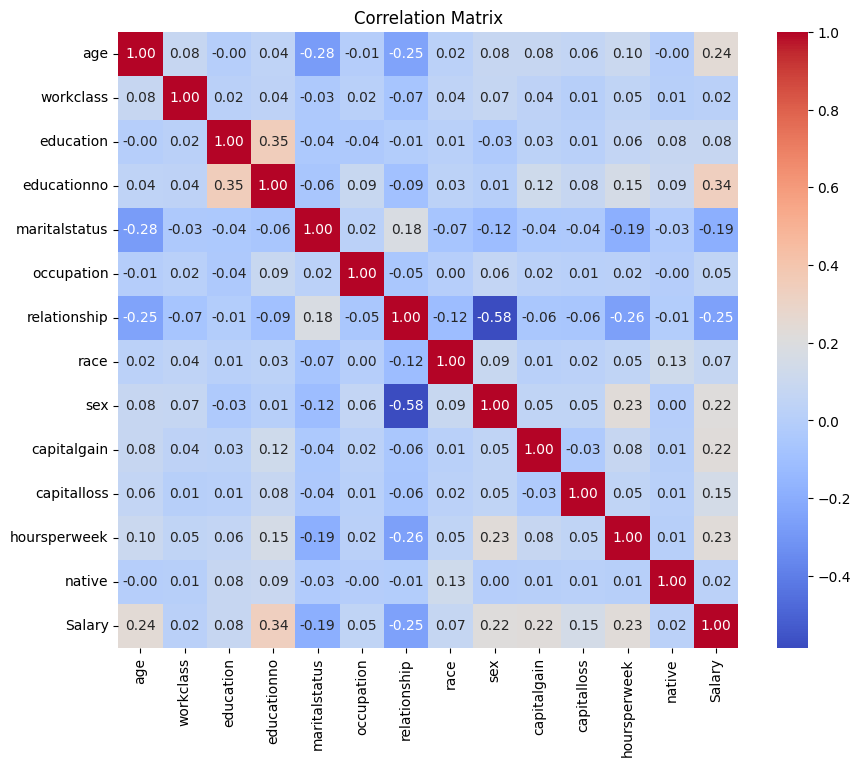

In [ ]:
# Example for visualizing correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
